<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/kjghfnxggdgbvg/blob/main/multi_linear_regression_assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [233]:
df = pd.read_csv("/content/50_Startups.csv")

In [234]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [236]:
df.describe()


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [237]:
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [238]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [239]:
df['State'] = df['State'].astype('category')

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   R&D Spend        50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.9 KB


In [241]:
# rename columns

In [242]:
df1 = df.rename({'R&D Spend':'RD_Spend'},axis=1)

In [243]:
df2 = df1.rename({'Marketing Spend':'Marketing_Spend'},axis=1)

In [244]:
df2

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [245]:
# no missing value , no unique values

In [246]:
df2.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [247]:
# no duplicates

{'whiskers': [<matplotlib.lines.Line2D at 0x7a17a8275c60>,
 'caps': [<matplotlib.lines.Line2D at 0x7a17a8276d40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a17a8275fc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a17a8275f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a17a8277610>],
 'means': []}

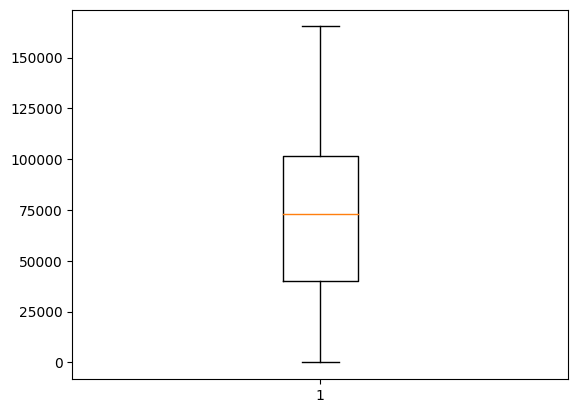

In [248]:
data_box = df2.dropna()
datal_box = data_box['RD_Spend']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a17a82e51b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a17a82e4dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a17a82e6470>],
 'medians': [<matplotlib.lines.Line2D at 0x7a17a82e76d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a17a82e7b20>],
 'means': []}

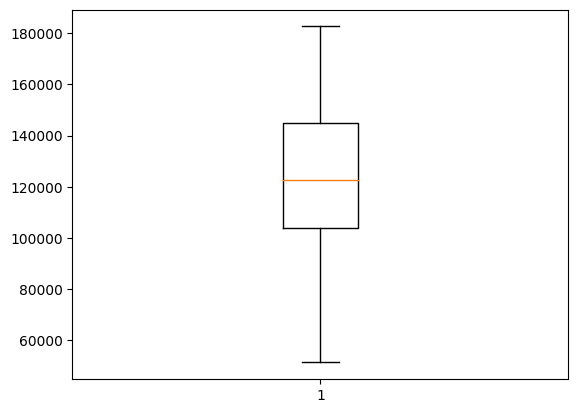

In [249]:
data_box = df2.dropna()
datal_box = data_box['Administration']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a17a81ddc00>,
 'caps': [<matplotlib.lines.Line2D at 0x7a17a81de140>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a17a81dd960>],
 'medians': [<matplotlib.lines.Line2D at 0x7a17a81de680>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a17a81de920>],
 'means': []}

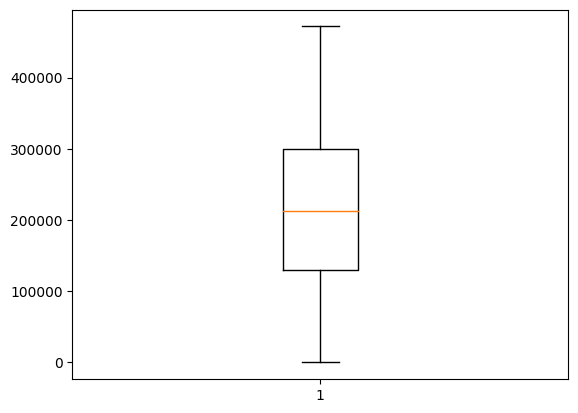

In [250]:
data_box = df2.dropna()
datal_box = data_box['Marketing_Spend']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a17a82335e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a17a8233a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a17a8233340>],
 'medians': [<matplotlib.lines.Line2D at 0x7a17a8233f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a17a8068220>],
 'means': []}

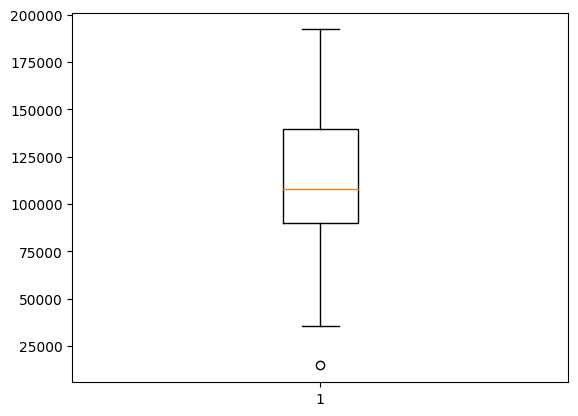

In [251]:
data_box = df2.dropna()
datal_box = data_box['Profit']
plt.boxplot(datal_box)

In [252]:
# no outlier

<ipython-input-253-a59c57797f82>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['RD_Spend'])


<Axes: xlabel='RD_Spend', ylabel='Density'>

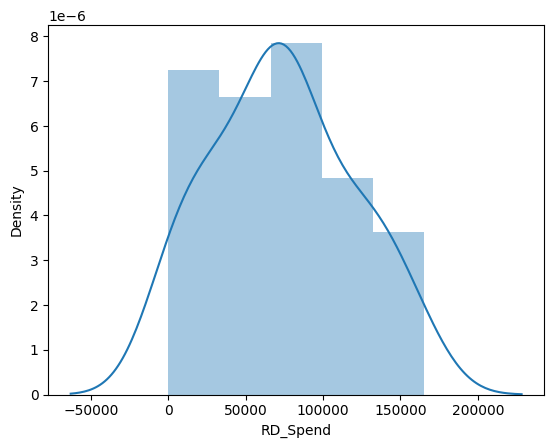

In [253]:
sns.distplot(df2['RD_Spend'])

<ipython-input-254-6ab550778d03>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Administration'])


<Axes: xlabel='Administration', ylabel='Density'>

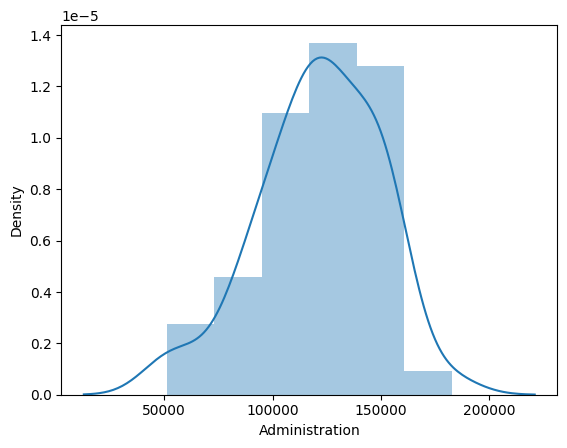

In [254]:
sns.distplot(df2['Administration'])

<ipython-input-255-560e4b9046f2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Profit'])


<Axes: xlabel='Profit', ylabel='Density'>

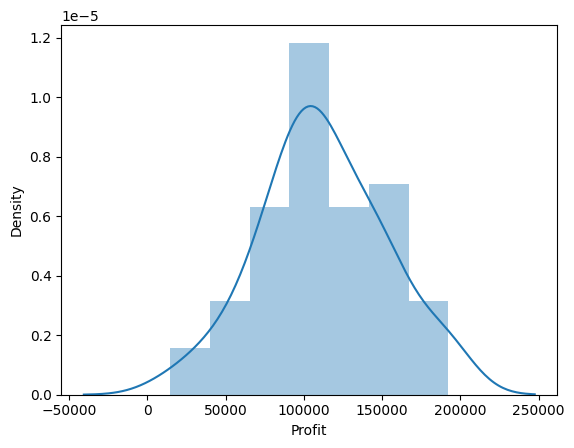

In [255]:
sns.distplot(df2['Profit'])

<ipython-input-256-928bbaf5add2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Marketing_Spend'])


<Axes: xlabel='Marketing_Spend', ylabel='Density'>

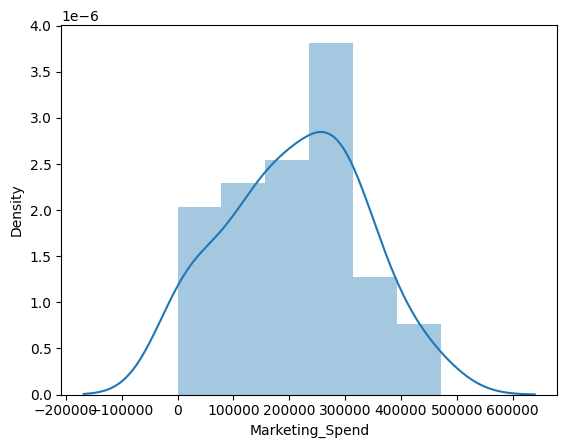

In [256]:
sns.distplot(df2['Marketing_Spend'])

In [257]:
# scatterplot plot and correlation analysis

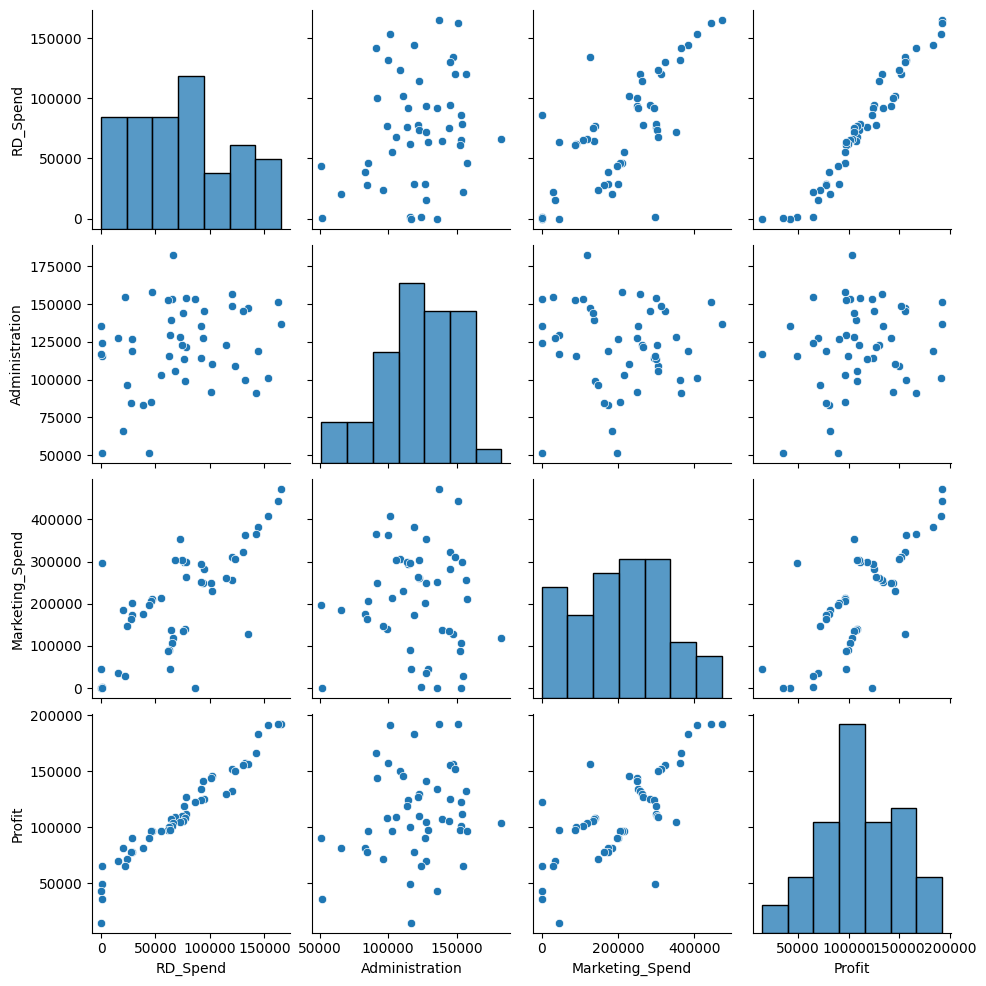

In [258]:
import seaborn as sns
sns.pairplot(df2)

In [259]:
df2.corr()

<ipython-input-259-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [260]:
# there is slight relation between marketing_spend and RD_spend

In [261]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=df2).fit()

In [262]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        12:28:09   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [263]:
model.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [264]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [265]:
import statsmodels.formula.api as smf
model_RD = smf.ols('Profit~RD_Spend',data=df2).fit()
model_RD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           3.50e-32
Time:                        12:28:09   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD_Spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [266]:
model_RD.params

Intercept    49032.899141
RD_Spend         0.854291
dtype: float64

In [267]:
(model_RD.rsquared,model_RD.rsquared_adj)

(0.9465353160804393, 0.9454214684987817)

In [268]:
import statsmodels.formula.api as smf
model_market = smf.ols('Profit~Marketing_Spend',data=df2).fit()
model_market.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           4.38e-10
Time:                        12:28:09   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [269]:
model_market.params

Intercept          60003.548816
Marketing_Spend        0.246459
dtype: float64

In [270]:
(model_market.rsquared,model_market.rsquared_adj)

(0.5591535746115515, 0.5499692740826254)

In [271]:
import statsmodels.formula.api as smf
model_both = smf.ols('Profit~RD_Spend+Marketing_Spend',data=df2).fit()
model_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           2.16e-31
Time:                        12:28:09   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [272]:
model_both.params

Intercept          46975.864221
RD_Spend               0.796584
Marketing_Spend        0.029908
dtype: float64

In [273]:
(model_both.rsquared,model_both.rsquared_adj)

(0.9504503015559763, 0.9483418037498477)

In [274]:
# variation inflation factor i.e,vif
rsq_RD = smf.ols('RD_Spend~Administration+Marketing_Spend',data=df2).fit().rsquared
vif_RD = 1/(1-rsq_RD)

rsq_Administration = smf.ols('Administration~RD_Spend+Marketing_Spend',data=df2).fit().rsquared
vif_Administration = 1/(1-rsq_Administration)

rsq_Market = smf.ols('Marketing_Spend~RD_Spend+Administration',data=df2).fit().rsquared
vif_Market = 1/(1-rsq_Market)

# storing vif values in a dataframe
d1 = {'variables':['RD_Spend','Administration','Marketing_Spend'],'VIF':[vif_RD,vif_Administration,vif_Market]}
vif_frame = pd.DataFrame(d1)
vif_frame

,variables,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


In [275]:
# residual analysis TEST FOR NORMALITY OF RESIDUALS(Q-Q PLOT)
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

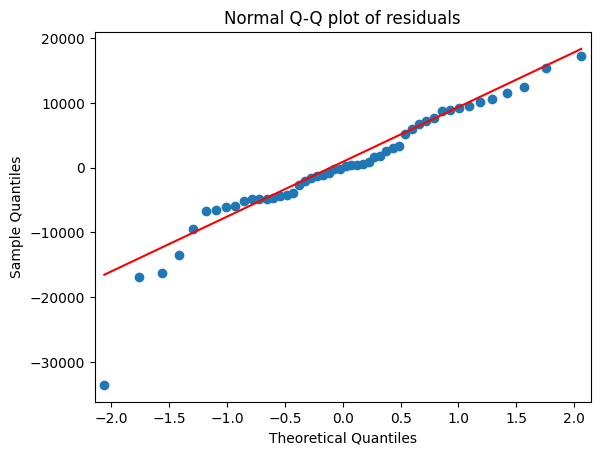

In [276]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [277]:
list(np.where(model.resid>10000))

[array([10, 12, 16, 36, 38, 45])]

In [278]:
# residual plot for Homoscedasticity

In [279]:
def get_standardized_values( vals ):
  return (vals - vals.mean())/vals.std()

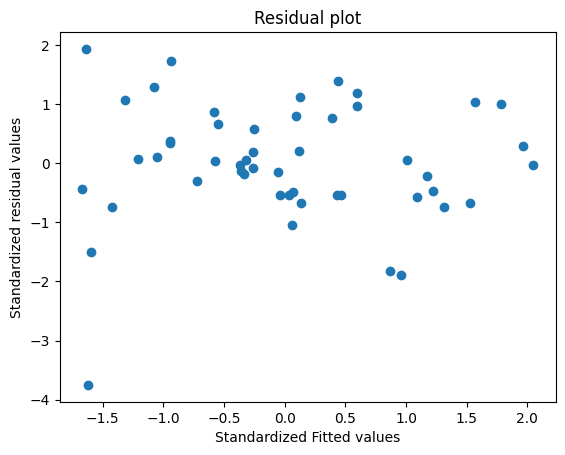

In [280]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

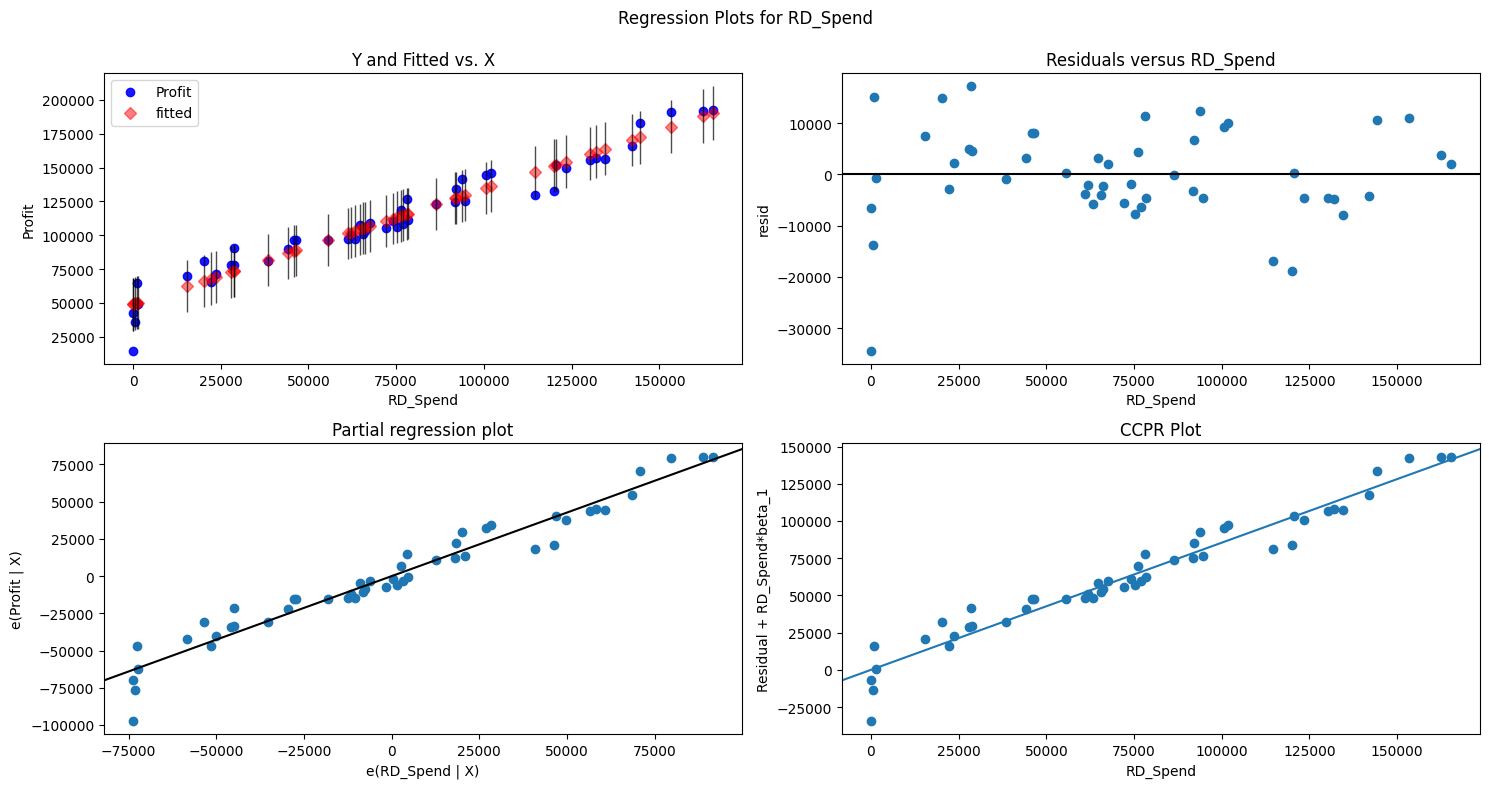

In [281]:
# Residual vs Regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_RD, "RD_Spend" , fig=fig)
plt.show()

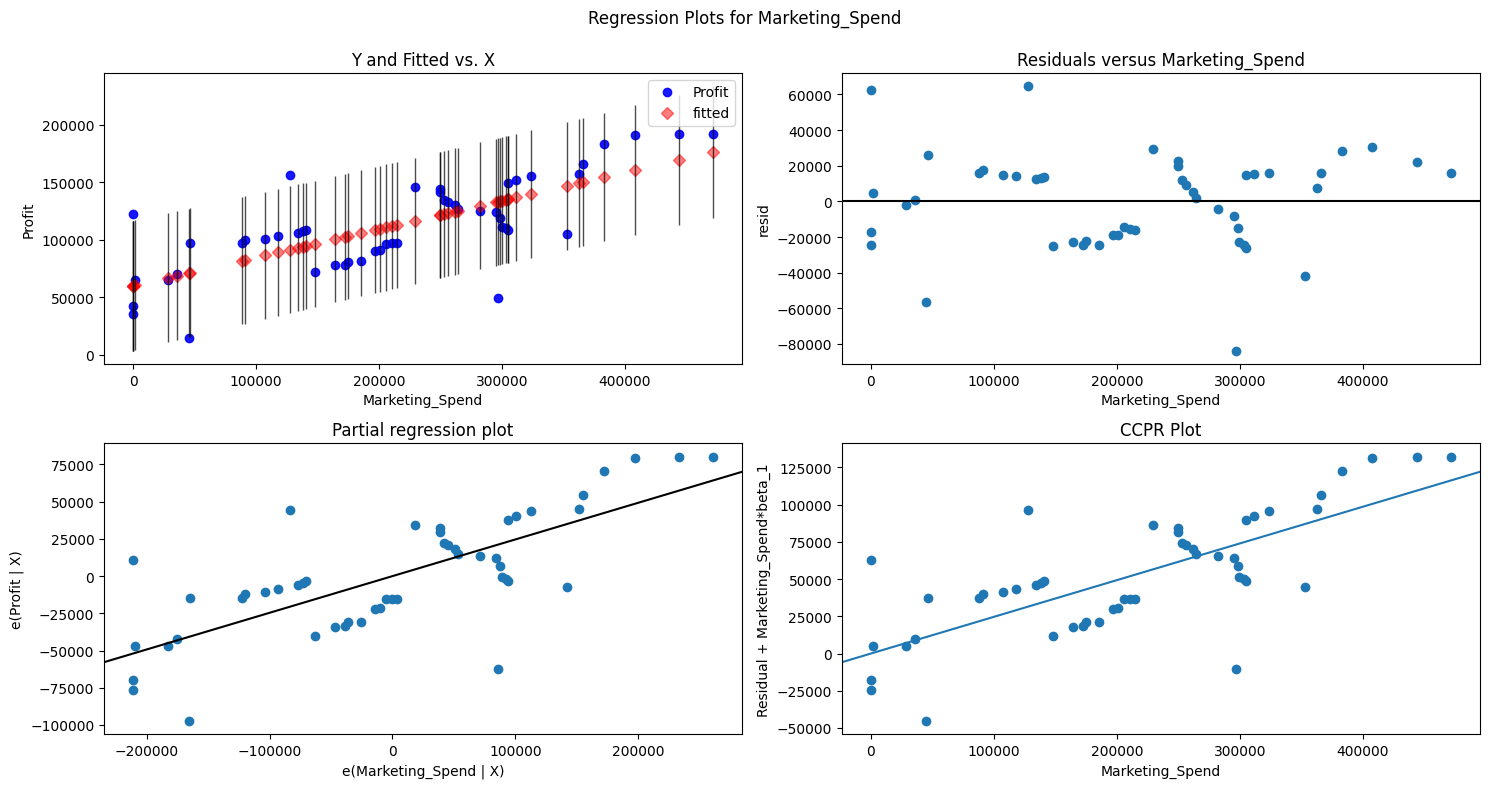

In [282]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_market, "Marketing_Spend" , fig=fig)
plt.show()

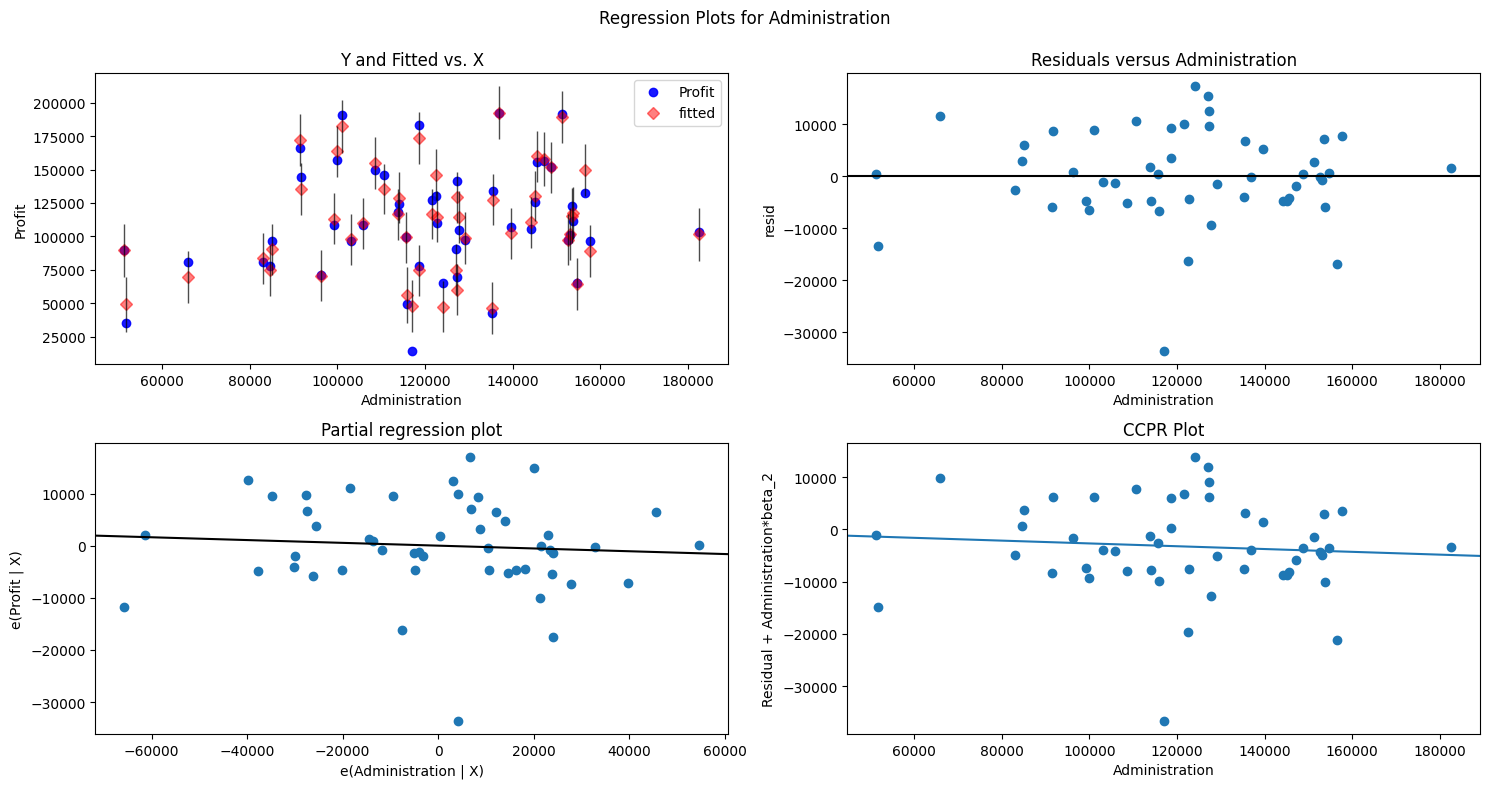

In [283]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration" , fig=fig)
plt.show()

In [284]:
# model deletion
# detecting influencers/Outliers
#Cook's Distance

In [285]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

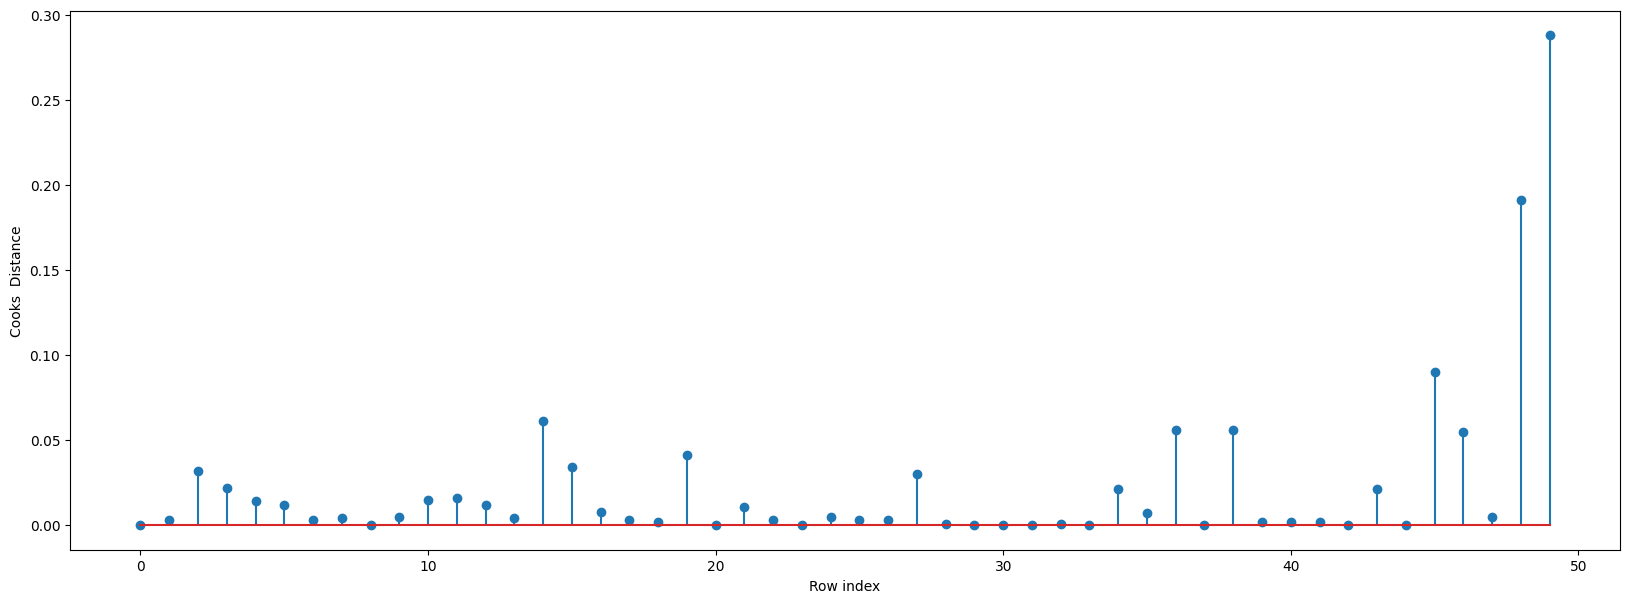

In [286]:
# plot the influence values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks  Distance')
plt.show()

In [287]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [288]:
# high influence points

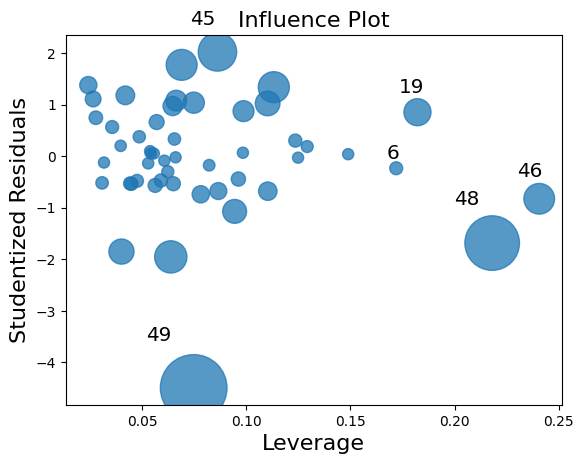

In [289]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [290]:
df2.shape

(50, 5)

In [291]:
k = df2.shape[1]
n = df2.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.36

In [292]:
# from the above plot,it is evident that data point 48,49 are the influencers

In [293]:
df2[df2.index.isin([48,49])]

,RD_Spend,Administration,Marketing_Spend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [294]:
df2.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [295]:
# improving the model

In [296]:
DF = df2.drop(df2.index[[48,49]],axis = 0)
DF

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [297]:
# BUILD MODEL

In [298]:
import statsmodels.formula.api as smf
modelFINAL = smf.ols('Profit~RD_Spend+Marketing_Spend',data=DF).fit()

In [299]:
modelFINAL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     553.1
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           2.09e-32
Time:                        12:28:12   Log-Likelihood:                -494.44
No. Observations:                  48   AIC:                             994.9
Df Residuals:                      45   BIC:                             1001.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.127e+04   2376.280     21.574      0.000    4.65e+04    5.61e+04
RD_Spend            0.7695      0.034     22.636      0.000       0.701       0.838
Marketing_Spend     0.0241      0.013      1.899      0.064      -0.001       0.050
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.282
Skew:                           0.016   Prob(JB):                        0.868
Kurtosis:                       2.626   Cond. No.                     5.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [300]:
DF.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,48.000000,48.000000,48.000000,48.000000
mean,76782.056875,122885.521458,218876.704792,115630.773958
std,44244.036139,26692.701530,118303.028079,36807.552792
min,0.000000,51283.140000,0.000000,42559.730000
25%,45528.002500,105077.645000,136984.482500,95036.680000
50%,74661.715000,123467.895000,221897.880000,108643.015000
75%,105065.712500,145190.700000,300632.782500,142253.990000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [301]:
# predciting for new data

In [302]:
new_data = pd.DataFrame({'RD_Spend':169000,'Administration':185000,'Marketing_Spend':481000},index=[1])

In [303]:
new_data

,RD_Spend,Administration,Marketing_Spend
1,169000,185000,481000


In [304]:
modelFINAL.predict(new_data)

1    192917.386211
dtype: float64

In [305]:
modelFINAL.predict(DF.iloc[0:5,:])

0    189885.740778
1    187095.246496
2    179181.591670
3    171606.096081
4    169451.985498
dtype: float64

In [306]:
DF.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [307]:
# IMPLEMENTION OF SKLEARN

In [308]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [309]:
X = DF.iloc[:, : -1].values # .values means  taking all values
y = DF.iloc[: , 4].values


In [310]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [311]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73])

In [312]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[3])],remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [313]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [314]:
# split training set and testing set

In [315]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [316]:
X_test.shape,X_train.shape

((10, 6), (38, 6))

In [317]:
y_train.shape,y_test.shape

((38,), (10,))

In [318]:
#create the model

In [319]:
model = LinearRegression()

In [320]:
# train model on training data
model.fit(X_train, y_train)

LinearRegression()

In [321]:
model.score(X_train,y_train)

0.965097585600446

In [322]:
### test the model on  the training set
ytrain_predicted =model.predict(X_train)

In [323]:
import numpy as np

training_error = y_train - ytrain_predicted

In [324]:
training_error

array([ 13248.52922779,  -1278.12762897,   3247.19684048, -14086.86356043,
         1073.35232379,    -90.29982438,  -4170.6957667 ,  -2732.84200513,
        -6151.58321   ,   -998.82258323,  -3830.75814505,   6870.50610015,
        -3665.06884516,  -1263.50881422,   4489.20845014,  -5365.77259956,
         5545.24716274,   -814.1075739 ,  -3226.07893893,  -4171.72896342,
         8500.79674611,   5537.09071222,  13060.51645448,   8611.92538193,
         9278.02504119,  -8466.07808179,  -4837.26756702,  -3050.88926853,
        -3121.52057796,  -5147.61991475,  13076.74086236,  -2466.1214625 ,
        -9795.40694061,  -9515.64264181,   6237.55891536,  -1527.16104103,
          -15.93211871,   1013.20385503])

In [325]:
train_mse = np.mean(training_error**2)

In [326]:
train_mse

42534127.74950252

In [327]:
train_rmse = np.sqrt(train_mse)

In [328]:
train_rmse

6521.8193588524455

In [329]:
## test model on testing set

In [330]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error
mse = mean_squared_error(y_train,ytrain_predicted)
mse

42534127.74950252

In [331]:
rmse = np.sqrt(mse)

In [332]:
rmse

6521.8193588524455

In [333]:
ytest_predicted = model.predict(X_test)

In [334]:
test_mse = mean_squared_error(y_test,ytest_predicted)

In [335]:
test_mse

82731476.33127464

In [336]:
test_rmse = np.sqrt(test_mse)

In [337]:
test_rmse

9095.684489430943

In [338]:
train_mse,test_mse

(42534127.74950252, 82731476.33127464)

In [339]:
train_rmse,test_rmse

(6521.8193588524455, 9095.684489430943)

In [340]:
mean_absolute_percentage_error(y_test,ytest_predicted)

0.05235573499434054